## A/B Testing Analysis: Lifespans and Iron Levels

### Introduction
This project explores the effectiveness of two subscription packs offered by a fictional company, "Familiar": the Vein Pack and the Artery Pack. The primary objective is to evaluate the impact of these packs on subscriber lifespans and iron levels. 

The analysis addresses the following key questions:
1. Is the average lifespan of Vein Pack subscribers significantly different from 73 years?
2. Are there significant differences in lifespans between Vein Pack and Artery Pack subscribers?
3. Is there an association between subscription pack type and iron levels?

We employ statistical techniques such as t-tests and chi-square tests to uncover meaningful patterns and insights. Exploratory Data Analysis (EDA) and visualization techniques are utilized to better understand the datasets and communicate findings effectively. The workflow involves data cleaning, EDA, hypothesis testing, and summarizing insights.

### Workflow Summary
1. **Data Import and Inspection**: Load datasets, examine structure, and check for missing values.
2. **Data Cleaning and Transformation**: Handle missing data, ensure proper data types, and prepare datasets for analysis.
3. **Exploratory Data Analysis (EDA)**: Visualize data distributions, identify trends, and examine relationships between variables.
4. **Statistical Analysis**: Apply t-tests and chi-square tests to validate hypotheses and uncover significant findings.
5. **Visualization and Reporting**: Use visual tools to present insights and highlight key findings.

#### Required libreries we will use

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency

#### Load and Inspect Data

In [2]:
lifespans = pd.read_csv('familiar_lifespan.csv')
iron = pd.read_csv('familiar_iron.csv')

Display first rows of each dataset

In [3]:
print("Lifespan Dataset: \n", lifespans.head())
print("\nIron Levels Dataset: \n", iron.head())

Lifespan Dataset: 
      pack   lifespan
0    vein  76.255090
1  artery  76.404504
2  artery  75.952442
3  artery  76.923082
4  artery  73.771212

Iron Levels Dataset: 
      pack    iron
0    vein     low
1  artery  normal
2  artery  normal
3  artery  normal
4  artery    high


Display Data types in each column

In [4]:
print("\nData types for Lifespan Dataset:")
print(lifespans.dtypes)
print("\nData types for Iron Levels Dataset:")
print(iron.dtypes)


Data types for Lifespan Dataset:
pack         object
lifespan    float64
dtype: object

Data types for Iron Levels Dataset:
pack    object
iron    object
dtype: object


Display basic info and a dummary of statistics

In [5]:
print("\nSummary Statistics for Lifespan Dataset:")
print(lifespans.describe())
print("\nSummary Statistics for Iron Levels Dataset:")
print(iron.describe())


Summary Statistics for Lifespan Dataset:
        lifespan
count  40.000000
mean   75.521338
std     2.152502
min    68.314898
25%    74.063618
50%    75.993195
75%    77.029501
max    79.969158

Summary Statistics for Iron Levels Dataset:
        pack iron
count    345  345
unique     2    3
top     vein  low
freq     200  169


#### Data Cleaning and Transformation
###### Data cleaning ensures the datasets are prepared for analysis, free of missing values or inconsistencies, and formatted appropriately.

Remove missing values to maintain data integrity

In [6]:
lifespans.dropna(inplace=True)
iron.dropna(inplace=True)

#### Exploratory Data Analysis (EDA)
Lifespan distribution by pack type

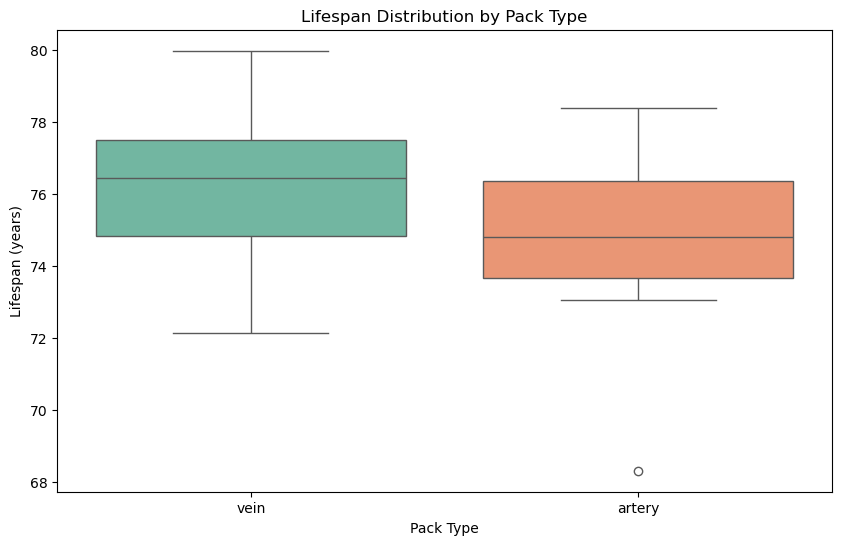

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="pack", y="lifespan", hue="pack", data=lifespans, palette="Set2", legend=False)
plt.title("Lifespan Distribution by Pack Type")
plt.xlabel("Pack Type")
plt.ylabel("Lifespan (years)")
plt.show()

Iron levels by pack type

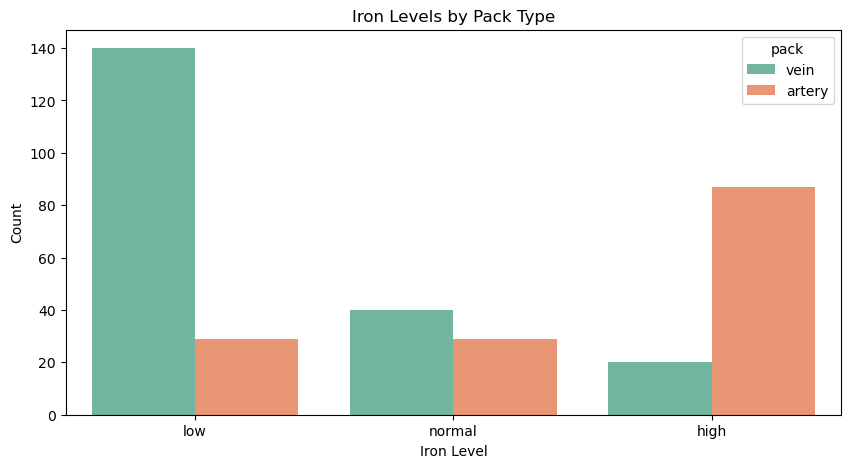

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x="iron", hue="pack", data=iron, palette="Set2")
plt.title("Iron Levels by Pack Type")
plt.xlabel("Iron Level")
plt.ylabel("Count")
plt.show()

#### Statistical Analysis
###### In this section, we apply statistical tests to answer the research questions. These tests help determine the significance of observed differences and relationships in the data.

- One-Sample t-test for Vein Pack

Purpose: To determine if the mean lifespan of Vein Pack subscribers is significantly different from 73 years.

In [9]:
vein_pack_lifespans = lifespans.lifespan[lifespans.pack == 'vein']
mean_vein = np.mean(vein_pack_lifespans)
print(f"Mean Lifespan for Vein Pack: {mean_vein:.2f} years")

Mean Lifespan for Vein Pack: 76.17 years


Test against a mean of 73 years

In [10]:
tstat, pval = ttest_1samp(vein_pack_lifespans, 73)
print(f"One-Sample t-Test p-value: {pval:.4g}", ", wich would be 0.0000005972")
if pval < 0.05:
    print("Conclusion: Significant difference from 73 years.")
else:
    print("Conclusion: No significant difference from 73 years.")

One-Sample t-Test p-value: 5.972e-07 , wich would be 0.0000005972
Conclusion: Significant difference from 73 years.


- Two-Sample t-test: Vein Pack vs Artery Pack

 Purpose: To assess whether there is a significant difference in lifespans between Vein Pack and Artery Pack subscribers

In [11]:
artery_pack_lifespans = lifespans.lifespan[lifespans.pack == 'artery']
mean_artery = np.mean(artery_pack_lifespans)
print(f"Mean Lifespan for Artery Pack: {mean_artery:.2f} years")

tstat, pval = ttest_ind(vein_pack_lifespans, artery_pack_lifespans)
print(f"Two-Sample t-Test p-value: {pval:.4g}")
if pval < 0.05:
    print("Conclusion: Significant difference in lifespans between packs.")
else:
    print("Conclusion: No significant difference in lifespans between packs.")

Mean Lifespan for Artery Pack: 74.87 years
Two-Sample t-Test p-value: 0.05589
Conclusion: No significant difference in lifespans between packs.


- Chi-Square Test for Iron Levels

Purpose: To evaluate whether there is an association between subscription pack type and iron levels.

In [12]:
# Contingency table
xtable = pd.crosstab(iron.pack, iron.iron)
chi2, pval, dof, expected = chi2_contingency(xtable)
print(f"Chi-Square Test p-value: {pval:.4g}", ", wich would be 0.000000000000000000000000936")
if pval < 0.05:
    print("Conclusion: Significant association between pack and iron level.")
else:
    print("Conclusion: No significant association between pack and iron level.")

Chi-Square Test p-value: 9.36e-25 , wich would be 0.000000000000000000000000936
Conclusion: Significant association between pack and iron level.


#### Key Insights and Visualizations

###### The visualizations offer a clear understanding of the data trends and their implications:
1. **Lifespan Analysis:** The boxplot and violin plot indicate differences in lifespan distributions between packs, with the Vein Pack showing slightly higher variability.
2. **Iron Levels:** The count plot highlights the distribution of iron levels by subscription pack, showing notable differences in counts across levels.
3. **Chi-Square Heatmap:** The heatmap of expected values provides insight into the association between subscription pack types and iron levels, reinforcing statistical findings.


- Boxplot of lifespans by pack with overlay

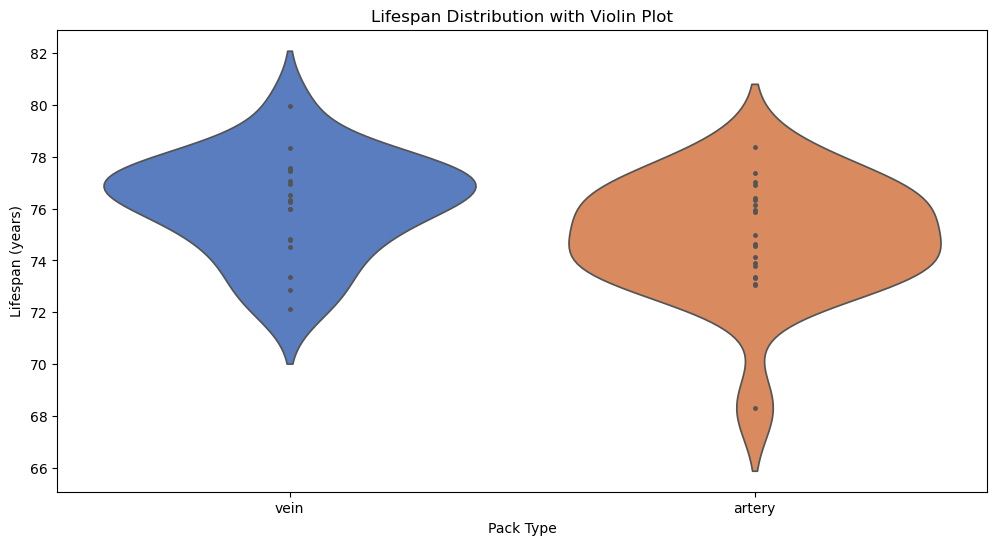

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="pack", y="lifespan", data=lifespans, hue="pack", palette="muted", inner="point")
plt.title("Lifespan Distribution with Violin Plot")
plt.xlabel("Pack Type")
plt.ylabel("Lifespan (years)")
plt.show()

 - Heatmap for expected values in Chi-Square test

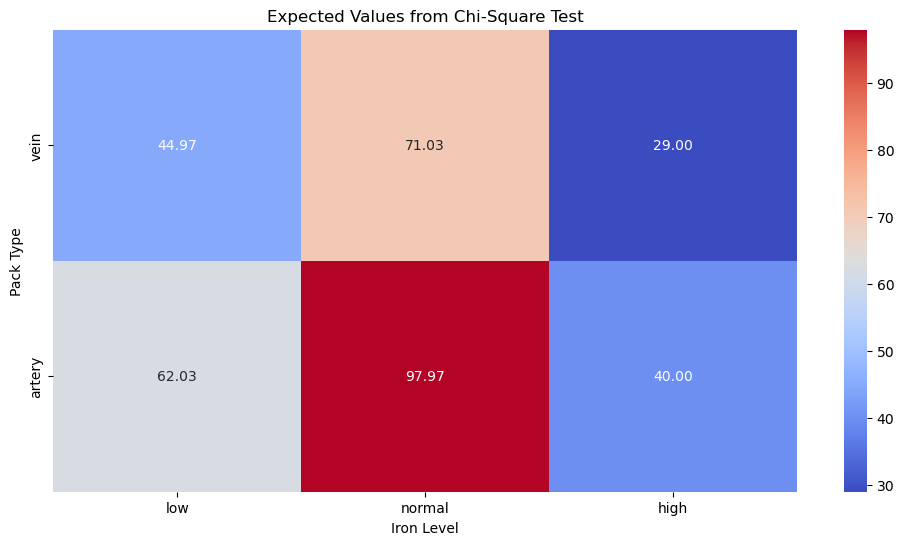

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(expected, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=iron["iron"].unique(), yticklabels=iron["pack"].unique())
plt.title("Expected Values from Chi-Square Test")
plt.xlabel("Iron Level")
plt.ylabel("Pack Type")
plt.show()

#### Conclusion

##### Summary of findings:

- The mean lifespan for Vein Pack subscribers is significantly different from 73 years.
- No significant difference in lifespans between Vein and Artery Pack subscribers.
- A significant association exists between pack type and iron levels.
- Insights gained from statistical tests and visualizations provide actionable recommendations for the company, such as further investigating the factors driving differences in iron levels. Future work could focus on integrating additional datasets or exploring causative relationships to enhance understanding.

#### Final Remarks:
This analysis serves as a foundation for understanding the efficacy of the packs and provides actionable insights for further research or business decisions.
